In [263]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [264]:
df = pd.read_csv('Ecommerce Customers', sep=',')

In [265]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [266]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


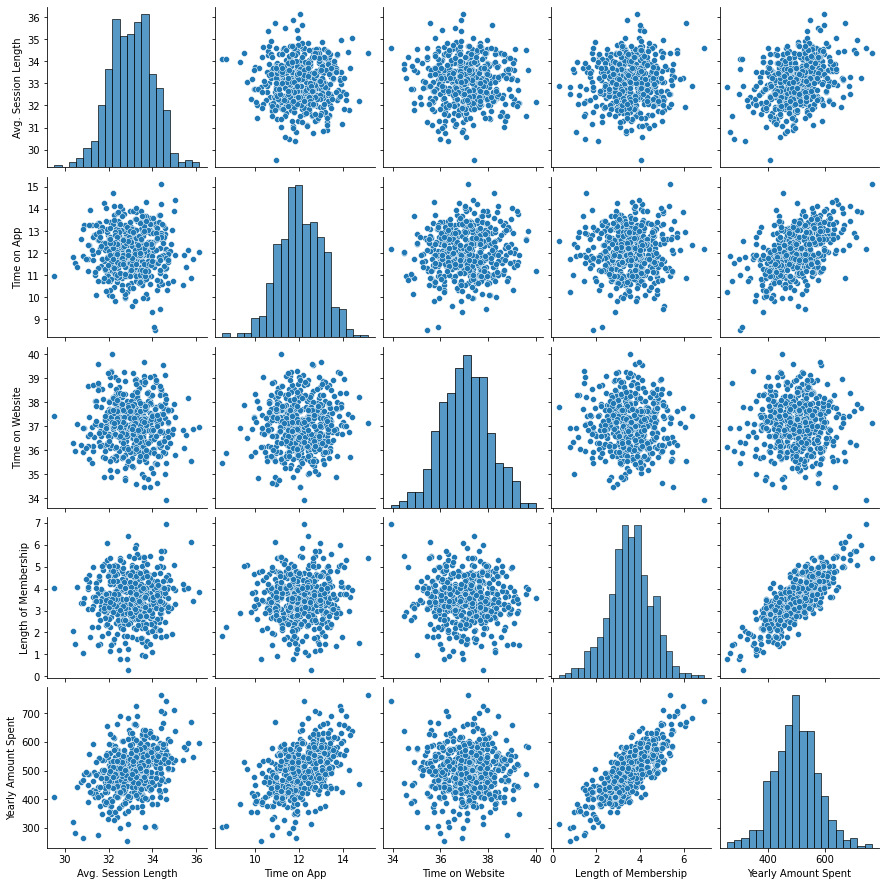

In [267]:
sns.pairplot(data=df)
plt.show()

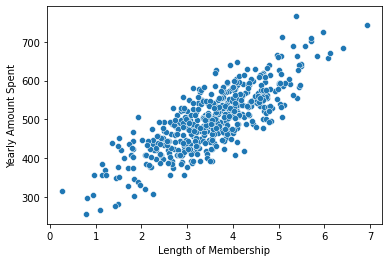

In [268]:
sns.scatterplot(x='Length of Membership', y='Yearly Amount Spent', data=df)

In [269]:
X = df.iloc[:,3:6]
y = df.iloc[:, -1]

print(X)
print(y)

     Avg. Session Length  Time on App  Time on Website
0              34.497268    12.655651        39.577668
1              31.926272    11.109461        37.268959
2              33.000915    11.330278        37.110597
3              34.305557    13.717514        36.721283
4              33.330673    12.795189        37.536653
..                   ...          ...              ...
495            33.237660    13.566160        36.417985
496            34.702529    11.695736        37.190268
497            32.646777    11.499409        38.332576
498            33.322501    12.391423        36.840086
499            33.715981    12.418808        35.771016

[500 rows x 3 columns]
0      587.951054
1      392.204933
2      487.547505
3      581.852344
4      599.406092
          ...    
495    573.847438
496    529.049004
497    551.620145
498    456.469510
499    497.778642
Name: Yearly Amount Spent, Length: 500, dtype: float64


In [279]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,  random_state=50)

In [280]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

prediction = lin_reg.predict(X_test)

In [281]:
from sklearn import metrics

In [282]:
print('MAE :'," ", metrics.mean_absolute_error(y_test,prediction))
print('MSE :'," ", metrics.mean_squared_error(y_test,prediction))
print('RMAE :'," ", np.sqrt(metrics.mean_absolute_error(y_test,prediction)))
print("R2_Score : ", " ",metrics.r2_score(y_test, prediction))

MAE :   44.86183401754537
MSE :   3644.993398363
RMAE :   6.697897731194868
R2_Score :    0.5118224946237431


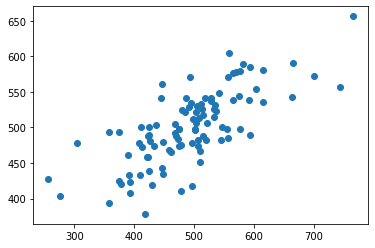

In [283]:
plt.scatter(y_test, prediction)

In [284]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
poly_X = poly.fit_transform(X_train)

lin_reg.fit(X_train, y_train)

prediction = lin_reg.predict(X_test)

print('MAE :'," ", metrics.mean_absolute_error(y_test,prediction))
print('MSE :'," ", metrics.mean_squared_error(y_test,prediction))
print('RMAE :'," ", np.sqrt(metrics.mean_absolute_error(y_test,prediction)))
print("R2_Score : ", " ",metrics.r2_score(y_test, prediction))


MAE :   44.86183401754537
MSE :   3644.993398363
RMAE :   6.697897731194868
R2_Score :    0.5118224946237431


In [285]:
from sklearn.tree import DecisionTreeRegressor

des_tree = DecisionTreeRegressor(max_depth=6, max_leaf_nodes=27)

des_tree.fit(X_train, y_train)

prediction = des_tree.predict(X_test)

print('MAE :'," ", metrics.mean_absolute_error(y_test,prediction))
print('MSE :'," ", metrics.mean_squared_error(y_test,prediction))
print('RMAE :'," ", np.sqrt(metrics.mean_absolute_error(y_test,prediction)))
print("R2_Score : ", " ",metrics.r2_score(y_test, prediction))

MAE :   46.17724348670149
MSE :   3561.0598732261483
RMAE :   6.7953839837570245
R2_Score :    0.5230637931504141


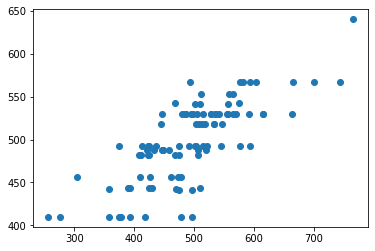

In [286]:
plt.scatter(y_test, prediction)

In [287]:
from sklearn.ensemble import RandomForestRegressor

ran_reg = RandomForestRegressor(random_state=25, max_depth=6, n_estimators=55, max_leaf_nodes=17)

ran_reg.fit(X_train, y_train)

prediction = ran_reg.predict(X_test)

print('MAE :'," ", metrics.mean_absolute_error(y_test,prediction))
print('MSE :'," ", metrics.mean_squared_error(y_test,prediction))
print('RMAE :'," ", np.sqrt(metrics.mean_absolute_error(y_test,prediction)))
print("R2_Score : ", " ",metrics.r2_score(y_test, prediction))

MAE :   47.45764613965469
MSE :   3912.7746185411447
RMAE :   6.8889510188166305
R2_Score :    0.47595829577172677
